In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV and Perform Basic Data Cleaning

In [2]:
# Read CSV file 
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head(10)

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
5,CONFIRMED,0,0,0,0,2.566589,1.780000e-05,-1.780000e-05,179.554370,0.004610,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,CONFIRMED,0,0,0,0,16.068647,1.090000e-05,-1.090000e-05,173.621937,0.000517,...,-83,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841
7,CONFIRMED,0,0,0,0,2.470613,2.700000e-08,-2.700000e-08,122.763305,0.000009,...,-78,4.457,0.024,-0.024,0.964,0.038,-0.038,286.80847,49.316399,11.338
8,CONFIRMED,0,1,0,0,2.204735,4.300000e-08,-4.300000e-08,121.358542,0.000016,...,-89,4.019,0.033,-0.027,1.952,0.099,-0.110,292.24728,47.969521,10.463
9,CONFIRMED,0,0,0,0,3.522498,1.980000e-07,-1.980000e-07,121.119423,0.000047,...,-137,4.169,0.055,-0.045,1.451,0.110,-0.110,281.28812,42.451080,13.563


# Select features (columns)

In [ ]:
# Set features
# selected_features = df[['names', 'of', 'selected', 'features', 'here']]
selected_features = df

# Create a Train Test Split
Use koi_disposition for the y values

In [3]:
# Assign x and y values
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]

print(X.shape, y.shape)

(6991, 40) (6991,)


In [4]:
# Import Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=115, stratify=y)

In [5]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2700,0,0,0,0,31.804760,0.000091,-0.000091,190.25413,0.00224,-0.00224,...,-128,4.235,0.143,-0.117,1.356,0.212,-0.259,287.62082,43.141647,13.178
21,0,0,0,0,4.280964,0.000006,-0.000006,171.89659,0.00115,-0.00115,...,-169,4.564,0.032,-0.168,0.831,0.207,-0.069,294.26581,49.314091,15.356
5040,0,1,1,0,0.829019,0.000002,-0.000002,131.46667,0.00401,-0.00401,...,-255,4.271,0.124,-0.186,1.328,0.408,-0.220,296.03485,45.490822,14.661
2795,0,0,1,0,1.387838,0.000006,-0.000006,132.11351,0.00318,-0.00318,...,-219,4.442,0.054,-0.216,1.044,0.335,-0.112,295.64212,48.773071,15.167
1765,0,0,0,0,14.383227,0.000086,-0.000086,140.57648,0.00530,-0.00530,...,-135,4.249,0.137,-0.112,1.291,0.216,-0.216,290.08276,50.863480,13.312


k: 1, Train/Test Score: 1.000/0.605
k: 3, Train/Test Score: 0.781/0.630
k: 5, Train/Test Score: 0.736/0.634
k: 7, Train/Test Score: 0.725/0.642
k: 9, Train/Test Score: 0.707/0.652
k: 11, Train/Test Score: 0.699/0.649
k: 13, Train/Test Score: 0.695/0.650
k: 15, Train/Test Score: 0.694/0.654
k: 17, Train/Test Score: 0.683/0.660
k: 19, Train/Test Score: 0.684/0.666
k: 21, Train/Test Score: 0.680/0.665
k: 23, Train/Test Score: 0.677/0.671
k: 25, Train/Test Score: 0.674/0.665
k: 27, Train/Test Score: 0.667/0.661
k: 29, Train/Test Score: 0.666/0.661
k: 31, Train/Test Score: 0.666/0.661
k: 33, Train/Test Score: 0.662/0.672
k: 35, Train/Test Score: 0.659/0.669
k: 37, Train/Test Score: 0.657/0.670
k: 39, Train/Test Score: 0.656/0.670
k: 41, Train/Test Score: 0.653/0.667
k: 43, Train/Test Score: 0.654/0.664
k: 45, Train/Test Score: 0.655/0.666
k: 47, Train/Test Score: 0.653/0.668
k: 49, Train/Test Score: 0.652/0.667
k: 51, Train/Test Score: 0.649/0.664
k: 53, Train/Test Score: 0.647/0.666
k: 55,

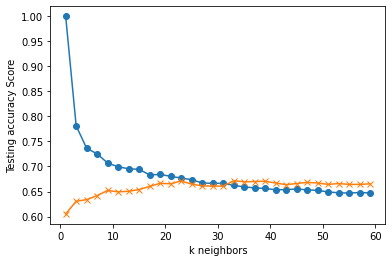

In [6]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [7]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
print('k=29 Test Acc: %.3f' % knn.score(X_test, y_test))

k=29 Test Acc: 0.661


In [8]:
print(f"Training Data Score: {knn.score(X_train, y_train)}")
print(f"Testing Data Score: {knn.score(X_test, y_test)}")

Training Data Score: 0.6662216288384513
Testing Data Score: 0.6607551487414187


In [9]:
knn.predict(X_test)[:10]

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE',
       'CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [10]:
#  predict_proba shows how likely the point was to be classified as a `'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE'`

knn.predict_proba(X_test)[:10]

array([[0.03448276, 0.        , 0.96551724],
       [0.27586207, 0.17241379, 0.55172414],
       [0.34482759, 0.44827586, 0.20689655],
       [0.37931034, 0.27586207, 0.34482759],
       [0.51724138, 0.34482759, 0.13793103],
       [0.24137931, 0.51724138, 0.24137931],
       [0.06896552, 0.        , 0.93103448],
       [0.17241379, 0.10344828, 0.72413793],
       [0.20689655, 0.27586207, 0.51724138],
       [0.4137931 , 0.37931034, 0.20689655]])

# Pre-processing
Scale the data using the MinMaxScaler and perform some feature selection

In [11]:
# Scale the data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Train Model - KNN
Use K Nearest Neighbor (KNN) model

k: 1, Train/Test Score: 1.000/0.794
k: 3, Train/Test Score: 0.900/0.808
k: 5, Train/Test Score: 0.877/0.813
k: 7, Train/Test Score: 0.872/0.818
k: 9, Train/Test Score: 0.863/0.818
k: 11, Train/Test Score: 0.854/0.819
k: 13, Train/Test Score: 0.848/0.812
k: 15, Train/Test Score: 0.847/0.812
k: 17, Train/Test Score: 0.844/0.810
k: 19, Train/Test Score: 0.843/0.812
k: 21, Train/Test Score: 0.842/0.810
k: 23, Train/Test Score: 0.842/0.809
k: 25, Train/Test Score: 0.838/0.814
k: 27, Train/Test Score: 0.836/0.810
k: 29, Train/Test Score: 0.837/0.812
k: 31, Train/Test Score: 0.835/0.812
k: 33, Train/Test Score: 0.834/0.811
k: 35, Train/Test Score: 0.835/0.808
k: 37, Train/Test Score: 0.833/0.806
k: 39, Train/Test Score: 0.833/0.811
k: 41, Train/Test Score: 0.831/0.807
k: 43, Train/Test Score: 0.829/0.805
k: 45, Train/Test Score: 0.828/0.808
k: 47, Train/Test Score: 0.827/0.812
k: 49, Train/Test Score: 0.827/0.808
k: 51, Train/Test Score: 0.827/0.807
k: 53, Train/Test Score: 0.824/0.811
k: 55,

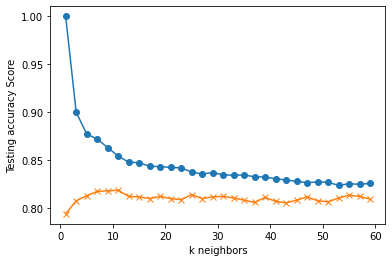

In [12]:
# Create the KNN Model
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.8258630555025749
Testing Data Score: 0.8094965675057209


In [14]:
knn.predict(X_test_scaled)[:10]

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE',
       'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'CONFIRMED'], dtype=object)

In [15]:
knn.predict_proba(X_test)[:10]

array([[0.01694915, 0.        , 0.98305085],
       [0.05084746, 0.03389831, 0.91525424],
       [0.06779661, 0.03389831, 0.89830508],
       [0.06779661, 0.03389831, 0.89830508],
       [0.06779661, 0.03389831, 0.89830508],
       [0.06779661, 0.03389831, 0.89830508],
       [0.        , 0.        , 1.        ],
       [0.08474576, 0.03389831, 0.88135593],
       [0.08474576, 0.03389831, 0.88135593],
       [0.06779661, 0.03389831, 0.89830508]])

# Hyperparameter Tuning
Use GridSearchCV to tune the KNN model's parameters

In [16]:
k_range = list(range(1, 60, 2))
print(k_range)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59]


In [17]:
param_grid = dict(n_neighbors=k_range, weights = ['uniform', 'distance'], metric =['euclidean','manhattan'] )
print(param_grid)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


In [18]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, verbose =1, cv = 10, n_jobs = -1)

In [19]:
grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  1.1min finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=59), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31, 33, 35, 37, 39, 41,
                                         43, 45, 47, 49, 51, 53, 55, 57, 59],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [20]:
# List the best parameters for this dataset
print(f"Best Grid Parameters: {grid.best_params_}")

# List the best score
print(f"Best Grid Score: {grid.best_score_}")

# List the best estimator
print(f"Best Grid Estimator: {grid.best_estimator_}")

Best Grid Parameters: {'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}
Best Grid Score: 0.8491290439840059
Best Grid Estimator: KNeighborsClassifier(metric='manhattan', n_neighbors=17, weights='distance')


In [21]:
print(f"Training Grid Score: {grid.score(X_train_scaled, y_train)}")

Training Grid Score: 1.0


In [22]:
print(f"Testing Grid Score: {grid.score(X_test_scaled, y_test)}")


Testing Grid Score: 0.8335240274599542


In [23]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)

In [24]:
knn.predict(X_test_scaled)[:10]

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE', 'FALSE POSITIVE',
       'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE',
       'FALSE POSITIVE', 'CONFIRMED'], dtype=object)

In [25]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                precision    recall  f1-score   support

     CANDIDATE       0.74      0.51      0.61       422
     CONFIRMED       0.65      0.82      0.72       450
FALSE POSITIVE       0.99      1.00      0.99       876

      accuracy                           0.83      1748
     macro avg       0.79      0.78      0.77      1748
  weighted avg       0.84      0.83      0.83      1748



# Save the Model

In [26]:
# Save the model 

import joblib
filename = 'MYCROFTXTREEM_KNN.sav'
joblib.dump(knn, filename)

['MYCROFTXTREEM_KNN.sav']